# Week 1: It is starting.


In [3]:
#retrieving friends lists

import csv
import re
import matplotlib.pyplot as plt

#initializing dictionnary of friends
#this dictionnary contains every user's list of friends using user IDs
friends_dict={}
with open('data/friends.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
      friends_dict[row['# Friendship between two user IDs is indicated by a comma-separated entry.']]=[]

#filling the dictionnary
with open('data/friends.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
      friends_dict[row['# Friendship between two user IDs is indicated by a comma-separated entry.']].append(row[None][0])

print('user 360\'s friends list: ',friends_dict['360'])


#retrieving number of concerts

#this dictionnary contains the number of concerts for one genre
concert_numbers={}
with open('data/n_concerts.txt', 'r') as f:
    lines = f.readlines()
    for l in lines:
      x=re.search('([\w| |/|&|-]+):([0-9]+)',l)
      if x:
        concert_numbers[x.group(1)]=[x.group(2)][0]

print('number of classical concerts: ',concert_numbers['Classical'])

user 360's friends list:  ['4719', '4720', '4721', '4722', '14', '4723', '1020', '4724', '4725', '4726', '4727', '4728', '4729', '1286', '4730', '4731', '4732', '4733', '4734', '4735', '4736', '4737', '1075']
number of classical concerts:  24


In [4]:
# retrieving preferences

import json

# get the genres a user likes using their ID
def getGenresFromId(id):
  genresNum=[]
  genres=[]
  with open('data/preferences.json', 'r') as f:
    data = json.load(f)
    preferences=data[str(id)]
  for i in range(len(preferences)):
    if preferences[i]=='1':
      genresNum.append(i)
  with open('data/preferences_description.txt') as f:
    lines = f.readlines()
    for num in genresNum:
      genres.append(lines[num+2].rstrip())
  return(genres)
  
getGenresFromId(4)

['Romantic',
 'Contemporary Soul',
 'Baroque',
 'Urban Cowboy',
 'Asian Music',
 'Tropical',
 'Film Scores',
 'Grime',
 'Brazilian Music',
 'Bollywood',
 'Nursery Rhymes',
 'Ranchera',
 'Oldschool R&B',
 'Soul & Funk',
 'Electro',
 'Films/Games',
 'Hard Rock']

In [5]:
# calculates the number of concert two friends (id1,id2) are attending together
def numberOfConcerts2Friends(id1,id2):
  total_number_of_concert=0
  # calculates the number of concert for every genre they both like
  genres_both_like= [element for element in getGenresFromId(id1) if element in getGenresFromId(id2)]
  for g in genres_both_like:
    total_number_of_concert+=0.393*float(concert_numbers[g])
  # calculates the number of concert for every genre only one of them likes
  genres_one_likes=list(set(getGenresFromId(id1)).symmetric_difference(getGenresFromId(id2)))
  for g in genres_one_likes:
    total_number_of_concert+=0.018*float(concert_numbers[g])
  genres=concert_numbers.keys()
  # calculates the number of concert for every genre none of them likes
  genres_none_like=[element for element in genres if element not in list(set(genres_both_like)|set(genres_one_likes))]
  for g in genres_none_like:
    total_number_of_concert+=0.002*float(concert_numbers[g])
  return total_number_of_concert
numberOfConcerts2Friends(360,4719)

10.453999999999999

In [6]:
def numberOfConcerts1User(id):
  res=0
  for f in friends_dict[str(id)]:
    res+=numberOfConcerts2Friends(id,int(f))
  return res

user_list=[]
for user in friends_dict.keys():
  user_list.append((numberOfConcerts1User(int(user)),user))

KeyboardInterrupt: 

In [ ]:
import networkx as nx
def create_network():
    # create an empty graph
    G = nx.Graph()

    # add nodes to the graph representing individual people
    for user in friends_dict.keys():
        G.add_node(user)
    
    # add edges to the graph representing co-visits to concerts
    for user in friends_dict.keys():
        for friend in friends_dict[user]:
            if not G.has_edge(user,friend):
                weight=numberOfConcerts2Friends(int(user),int(friend))
                G.add_edge(user, friend,weight=weight)
    print(G.number_of_edges())
    # nx.write_gexf(G,"test.gexf")
    # # apply centrality measures to the graph
    # degree_centrality = nx.degree_centrality(G)
    # betweenness_centrality = nx.betweenness_centrality(G)

    # # print the centrality scores for each node
    # for node in G.nodes():
    #     print("Node:", node)
    #     print("Degree centrality:", degree_centrality[node])
    #     print("Betweenness centrality:", betweenness_centrality[node])

create_network()


KeyboardInterrupt: 

!
1


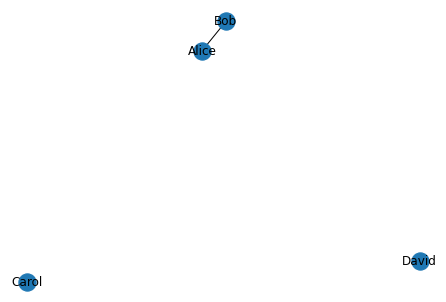

In [ ]:
# create an empty graph
G = nx.Graph()

# add nodes to the graph representing individual people
G.add_node("Alice")
G.add_node("Bob")
G.add_node("Carol")
G.add_node("David")

# add edges to the graph representing co-visits to concerts
G.add_edge("Alice", "Bob")
if G.has_edge("Bob","Alice"): 
  print("!")
  G.add_edge("Alice", "Bob")

print(G.number_of_edges())

nx.draw(G,with_labels=True, connectionstyle='arc3, rad = 0.1')